# 도배 하자 유형 분류

# 1. Dataset Preprocess

In [ ]:
from data import Preprocess

# Preprocess 객체 생성
preprocess = Preprocess()

## 폴더명 변경

In [ ]:
directory_path = './dataset/train'

# 한글폴더명 그대로 사용하면 오류나기 때문에 폴더명을 정수로 변경
preprocess.change_folder_name(directory_path)

# 파일 개수 세서 데이터프레임에 추가
papering_df = preprocess.count_files(directory_path)

papering_df

,하자종류,label,file_count
0,가구수정,0,12.0
1,걸레받이수정,1,307.0
2,곰팡이,2,145.0
3,꼬임,3,210.0
4,녹오염,4,14.0
5,들뜸,5,54.0
6,면불량,6,99.0
7,몰딩수정,7,130.0
8,반점,8,3.0
9,석고수정,9,57.0


In [ ]:
# 커널이 자꾸 죽어서 이미지 확인 불가능...
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# 디렉토리에서 첫 번째 이미지를 가져와서 표시
def show_first_image_from_directory(directory_path):
    # 클래스 디렉토리 목록 가져오기
    class_directories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

    # 각 클래스별로 첫 번째 이미지 가져와 표시
    for class_dir in class_directories:
        class_path = os.path.join(directory_path, class_dir)
        image_files = [f for f in os.listdir(class_path) if f.endswith(".jpg") or f.endswith(".png")]
        if image_files:
            # 클래스 내의 첫 번째 이미지 선택
            image_file = image_files[0]
            image_path = os.path.join(class_path, image_file)

            # 이미지 로드 및 표시
            image = tf.io.read_file(image_path)
            image = tf.image.decode_image(image, channels=3)

            plt.figure(figsize=(5, 5))
            plt.imshow(image.numpy().astype("uint8"))
            plt.title(f"Class: {class_dir}")
            plt.axis("off")
            plt.show()

# 디렉토리에서 첫 번째 이미지를 가져와서 표시
show_first_image_from_directory('./dataset/train')


: 

## (224, 224, 3) dataset

In [ ]:
# train/val dataset

directory_path = './dataset/train'
labels = 'inferred'  # 디렉토리 구조에 따라 클래스 라벨 부여
label_mode = 'int'  # 정수형 클래스 라벨 사용
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (224, 224)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = 0.2
seed = 12345

# 정규화 안 된 train 데이터셋 로드
dataset_type = 'training'
train_ds_224 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 train 데이터셋 로드
train_ds_224 = preprocess.get_norm_dataset(dataset_type, train_ds_224)


# 정규화 안 된 validation 데이터셋 로드
dataset_type = 'validation'
val_ds_224 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 validation 데이터셋 로드
val_ds_224 = preprocess.get_norm_dataset(dataset_type, val_ds_224)

train_ds_224, val_ds_224

Found 3457 files belonging to 19 classes.
Using 2766 files for training.
Found 3457 files belonging to 19 classes.
Using 691 files for validation.


(<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
# test dataset

dataset_type = 'test'
directory_path = './dataset/test'
labels = None
label_mode = None
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (224, 224)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = None
seed = None

# 정규화 안 된 데이터셋 로드
test_ds_224 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 데이터셋 로드
test_ds_224 = preprocess.get_norm_dataset(dataset_type, test_ds_224)

test_ds_224

Found 792 files belonging to 1 classes.


<MapDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

## (227, 227, 3) dataset

In [ ]:
# train/val dataset

directory_path = './dataset/train'
labels = 'inferred'  # 디렉토리 구조에 따라 클래스 라벨 부여
label_mode = 'int'  # 정수형 클래스 라벨 사용
color_mode ='rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (227, 227)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = 0.2
seed = 12345

# 정규화 안 된 train 데이터셋 로드
dataset_type = 'training'
train_ds_227 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 train 데이터셋 로드
train_ds_227 = preprocess.get_norm_dataset(dataset_type, train_ds_227)


# 정규화 안 된 validation 데이터셋 로드
dataset_type = 'validation'
val_ds_227 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 validation 데이터셋 로드
val_ds_227 = preprocess.get_norm_dataset(dataset_type, val_ds_227)

train_ds_227, val_ds_227

Found 3457 files belonging to 19 classes.
Using 2766 files for training.
Found 3457 files belonging to 19 classes.
Using 691 files for validation.


(<MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
# test dataset

dataset_type = 'test'
directory_path = './dataset/test'
labels = None
label_mode = None
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (227, 227)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = None
seed = None

# 정규화 안 된 데이터셋 로드
test_ds_227 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 데이터셋 로드
test_ds_227 = preprocess.get_norm_dataset(dataset_type, test_ds_227)

test_ds_227

Found 792 files belonging to 1 classes.


<MapDataset element_spec=TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None)>

## (299, 299, 3) dataset

In [ ]:
# train/val dataset

directory_path = './dataset/train'
labels = 'inferred'  # 디렉토리 구조에 따라 클래스 라벨 부여
label_mode = 'int'  # 정수형 클래스 라벨 사용
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (299, 299)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = 0.2
seed = 12345

# 정규화 안 된 train 데이터셋 로드
dataset_type = 'training'
train_ds_299 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 train 데이터셋 로드
train_ds_299 = preprocess.get_norm_dataset(dataset_type, train_ds_299)


# 정규화 안 된 validation 데이터셋 로드
dataset_type = 'validation'
val_ds_299 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 validation 데이터셋 로드
val_ds_299 = preprocess.get_norm_dataset(dataset_type, val_ds_299)

train_ds_299, val_ds_299

Found 3457 files belonging to 19 classes.
Using 2766 files for training.
Found 3457 files belonging to 19 classes.
Using 691 files for validation.


(<MapDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <MapDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
# test dataset

dataset_type = 'test'
directory_path = './dataset/test'
labels = None
label_mode = None
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (299, 299)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = None
seed = None

# 정규화 안 된 데이터셋 로드
test_ds_299 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 데이터셋 로드
test_ds_299 = preprocess.get_norm_dataset(dataset_type, test_ds_299)

test_ds_299

Found 792 files belonging to 1 classes.


<MapDataset element_spec=TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None)>

# 2. Model Implementation & Training & Evalueation & Visualization

- base model
    - 'VGG16' (224, 224, 3)
    - 'VGG19' (224, 224, 3)
    - 'ResNet152' (227,227,3)
    - 'InceptionResNetV2' (299,299,3)
    - 'DenseNet121' (224, 224, 3)
    - 'DenseNet169' (224, 224, 3)
    - 'DenseNet201' (224, 224, 3)
    - 'MobileNet' (224, 224, 3)

- 손실함수
    - categorical_crossentropy : 라벨값이 원핫벡터인 경우
    - sparse_categorical_crossentropy : 라벨값이 정수형태인 경우
    - 0~18의 정수로 라벨링했기 때문에 sparse_categorical_crossentropy 사용

- precision_score, recall_score, f1_score의 average
    - 'micro' 평균화를 불균형 심한 데이터셋에서 사용하면 주류 클래스를 향한 평가가 편향될 수 있음
    - 'macro' 평균화는 각 클래스를 동등하게 취급하여 모든 클래스에 대한 모델 성능을 균형있게 제공
    - 클래스 간 불균형이 심하기 때문에 'macro' 사용

In [ ]:
from model import CustomModel
from evaluation import Evaluation

# CustomModel 객체 생성
custommodel = CustomModel()

# Evaluation 객체 생성
evaluation = Evaluation()

## VGG16 + layer[1000, 19], (224, 224, 3)
### val_accuracy: 0.5991

- VGG 모델은 깊은 신경망 구조를 가지고 있어서 이미지의 복잡한 특징을 효과적으로 학습 가능

- VGG의 깊은 네트워크 구조는 다양한 이미지 특징을 캡처하고 추상화할 수 있는 능력을 향상시킬 수 있음

- VGG는 간단한 구조로 모든 레이어가 3x3 크기의 작은 컨볼루션 필터로만 이루어져 있음. 이로 인해 모델이 학습되는 파라미터의 양을 줄이고, 과적합을 방지하면서도 높은 성능을 유지

- VGG는 사전에 학습된 VGG 모델을 사용하여 다른 이미지 분류 작업에 대해 추가 학습시킬 수 있음. 이는 적은 양의 데이터로도 좋은 성능을 얻을 수 있게 해줌

- VGG는 이미지의 다양한 추상적인 특징을 효과적으로 추출할 수 있는 능력을 가지고 있음. 이는 이미지의 내부 구조를 이해하고 유용한 정보를 추출하는 데 도움

In [ ]:
model_name = 'VGG16'
weights = 'imagenet'
include_top = False
input_shape = (224, 224, 3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
vgg16_model, vgg16_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

Epoch 1/10
87/87 [==============================] - 167s 2s/step - loss: 1.9699 - accuracy: 0.5083 - val_loss: 5.3646 - val_accuracy: 0.1592
Epoch 2/10
87/87 [==============================] - 165s 2s/step - loss: 0.7793 - accuracy: 0.7296 - val_loss: 1.7058 - val_accuracy: 0.4805
Epoch 3/10
87/87 [==============================] - 165s 2s/step - loss: 0.5318 - accuracy: 0.8095 - val_loss: 1.6217 - val_accuracy: 0.5181
Epoch 4/10
87/87 [==============================] - 166s 2s/step - loss: 0.3909 - accuracy: 0.8557 - val_loss: 1.5174 - val_accuracy: 0.5282
Epoch 5/10
87/87 [==============================] - 167s 2s/step - loss: 0.3230 - accuracy: 0.8778 - val_loss: 1.4772 - val_accuracy: 0.5991
Epoch 6/10
87/87 [==============================] - 165s 2s/step - loss: 0.2735 - accuracy: 0.8952 - val_loss: 1.8927 - val_accuracy: 0.5499
Epoch 7/10
87/87 [==============================] - 165s 2s/step - loss: 0.2345 - accuracy: 0.9114 - val_loss: 1.9224 - val_accuracy: 0.6078
Epoch 8/10
87

22/22 [==============================] - 32s 1s/step


c:\Users\user1\anaconda3\envs\SOHYUN\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.053309030276787794 0.055456133070512156 0.22575976845151954 0.053847529017191885


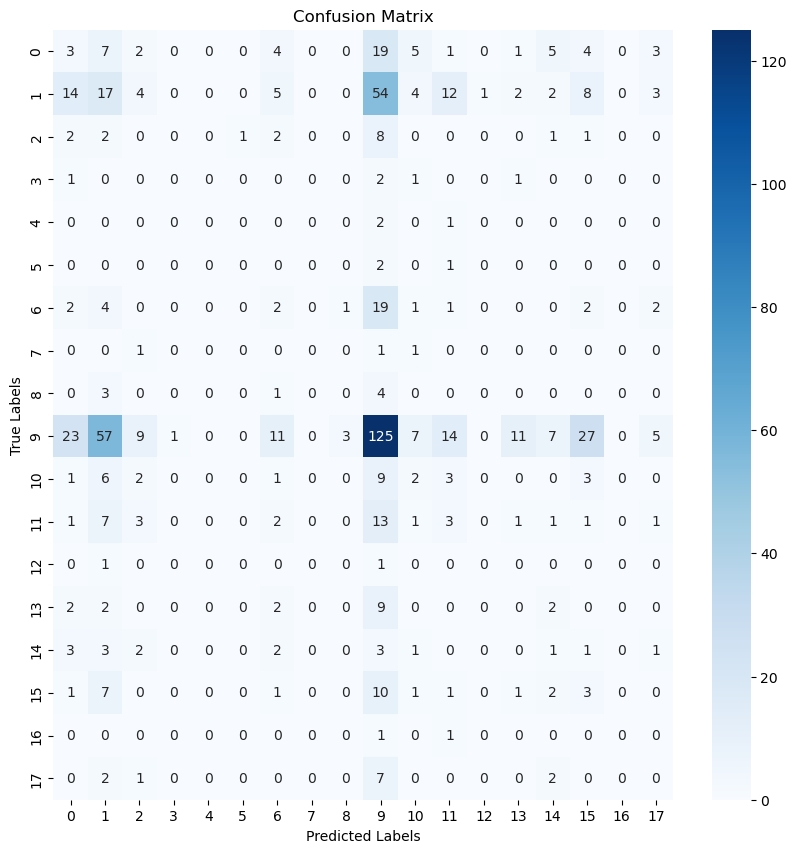

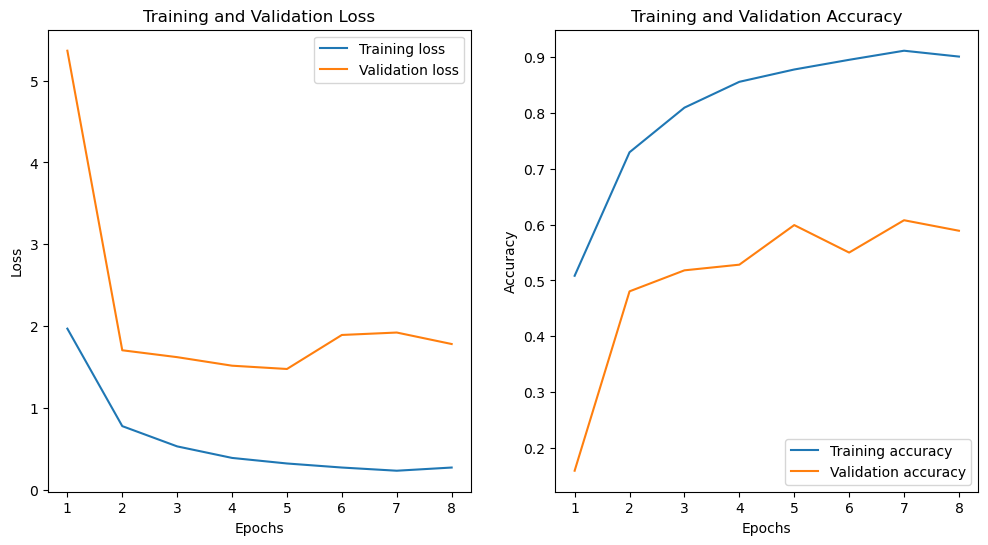

In [ ]:
val_ds = val_ds_224
eval_model = vgg16_model
history = vgg16_history

# 예측값과 실제값 데이터 프레임 생성
y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)

# precision, recall, accuracy, f1
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

# Confusion Matrix
evaluation.get_confusion_matrix()

# Loss, Accuracy 시각화 그래프
evaluation.get_visualization(history)

In [ ]:
# import pandas as pd
# dacon_df = pd.read_csv('./sample_submission.csv', encoding='cp949')
# test_df, test_pred, test_true = evaluation.get_prediction(eval_model, test_ds_224)
# dacon_df['label'] = test_df['pred']
# dacon_df.to_csv('dacon_submission.csv', index=False)
# dacon_df = pd.read_csv('./dacon_submission.csv', encoding='cp949')
# dacon_df

In [ ]:
# import tensorflow as tf
# # 모델을 만들고 학습시킨 후
# # 모델 저장 경로
# model_path = './my_model.h5'
# # 모델 저장
# model.save(model_path)

In [ ]:
# test dataset

dataset_type = 'test'
directory_path = './dataset/test'
labels = None
label_mode = None
color_mode = 'rgb'  # RGB 색상 모드로 이미지를 로드
batch_size = 32
image_size = (224, 224)  # 사용하는 모델에 맞춰서 사이즈 변경
validation_split = None
seed = None

# 정규화 안 된 데이터셋 로드
test_ds_224 = preprocess.get_raw_dataset(dataset_type, directory_path, labels, label_mode, color_mode, batch_size, image_size, validation_split, seed)
# 정규화 된 데이터셋 로드
test_ds_224 = preprocess.get_norm_dataset(dataset_type, test_ds_224)

test_df, test_pred, test_true = evaluation.get_prediction(eval_model, test_ds_224)
test_pred

Found 20 files belonging to 1 classes.
1/1 [==============================] - 1s 914ms/step


array([16, 10,  3, 10,  2,  7, 10, 10, 10, 10, 15, 10, 14, 10, 12, 10, 10,
       16,  2, 10], dtype=int64)

In [ ]:
# 119 틈새과다
# 122 오염
# 198 꼬임
# 199 오염
# 327 곰팡이
# 328 몰딩수정
# 427 오염
# 529 오염
# 530 오염
# 531 오염
# 560 터짐
# 615 오염
# 643 창틀,문틀수정
# 644 오염
# 762 울음
# 763 오염
# 764 오염
# 765 틈새과다
# 766 곰팡이
# 784 오염

## VGG16 + layer[512, 256, 19], (224, 224, 3)
### val_accuracy: 0.6020

In [ ]:
model_name = 'VGG16'
weights = 'imagenet'
include_top = False
input_shape = (224, 224, 3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
vgg16_model2, vgg16_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

Epoch 1/10
87/87 [==============================] - 82s 789ms/step - loss: 1.9063 - accuracy: 0.5098 - val_loss: 4.7220 - val_accuracy: 0.1158
Epoch 2/10
87/87 [==============================] - 71s 771ms/step - loss: 0.9539 - accuracy: 0.7014 - val_loss: 2.1751 - val_accuracy: 0.4891
Epoch 3/10
87/87 [==============================] - 61s 671ms/step - loss: 0.5653 - accuracy: 0.8048 - val_loss: 1.8593 - val_accuracy: 0.5557
Epoch 4/10
87/87 [==============================] - 68s 748ms/step - loss: 0.4113 - accuracy: 0.8554 - val_loss: 1.9087 - val_accuracy: 0.5282
Epoch 5/10
87/87 [==============================] - 68s 715ms/step - loss: 0.3375 - accuracy: 0.8836 - val_loss: 2.4923 - val_accuracy: 0.5239
Epoch 6/10
87/87 [==============================] - 74s 792ms/step - loss: 0.2637 - accuracy: 0.9046 - val_loss: 1.6824 - val_accuracy: 0.5890
Epoch 7/10
87/87 [==============================] - 59s 617ms/step - loss: 0.2160 - accuracy: 0.9226 - val_loss: 1.7916 - val_accuracy: 0.5948

22/22 [==============================] - 13s 441ms/step
0.18668596237337193 0.18668596237337193 0.18668596237337193 0.18668596237337193


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

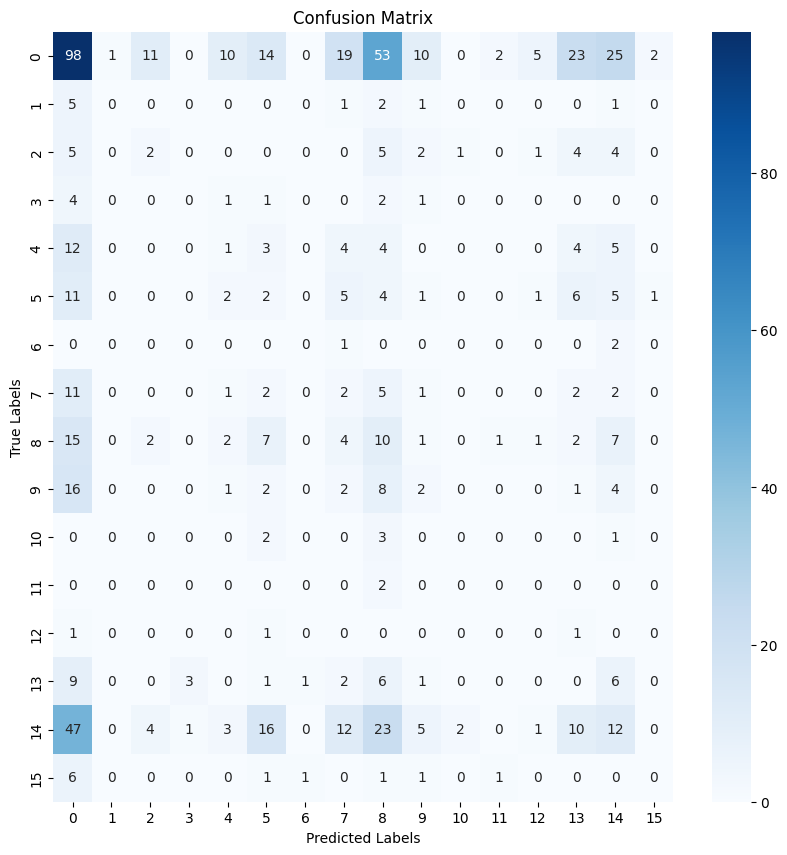

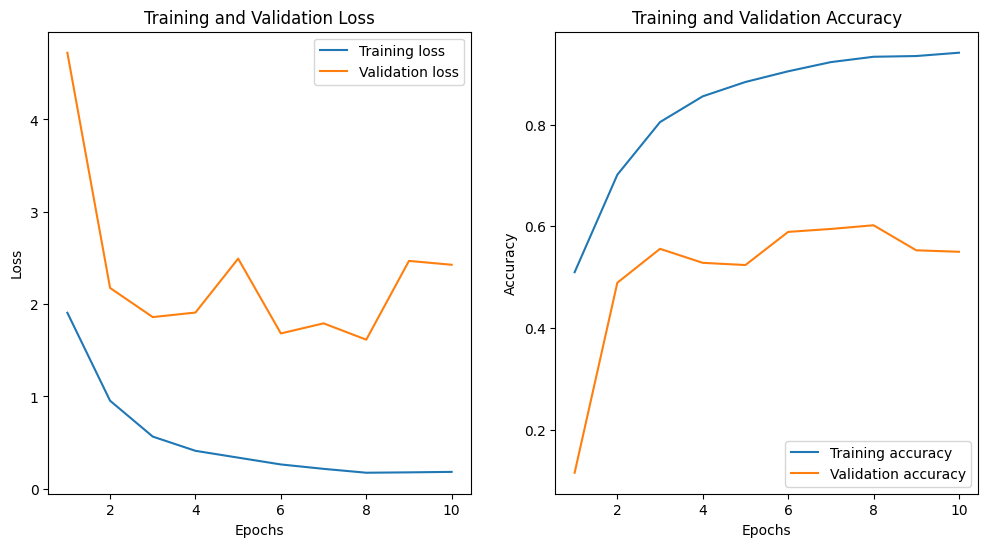

In [ ]:
val_ds = val_ds_224
eval_model = vgg16_model2
history = vgg16_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## VGG19 + layer[1000, 19], (224, 224, 3)
### val_accuracy: 0.5528

In [ ]:
model_name = 'VGG19'
weights = 'imagenet'
include_top = False
input_shape = (224, 224, 3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
vgg19_model, vgg19_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

Epoch 1/10
87/87 [==============================] - 75s 766ms/step - loss: 1.9034 - accuracy: 0.5275 - val_loss: 8.5668 - val_accuracy: 0.0926
Epoch 2/10
87/87 [==============================] - 81s 884ms/step - loss: 0.8543 - accuracy: 0.7086 - val_loss: 2.8422 - val_accuracy: 0.3676
Epoch 3/10
87/87 [==============================] - 43s 461ms/step - loss: 0.5712 - accuracy: 0.7907 - val_loss: 2.8645 - val_accuracy: 0.3227
Epoch 4/10
87/87 [==============================] - 43s 448ms/step - loss: 0.4748 - accuracy: 0.8189 - val_loss: 2.4126 - val_accuracy: 0.3849
Epoch 5/10
87/87 [==============================] - 42s 455ms/step - loss: 0.3758 - accuracy: 0.8518 - val_loss: 2.4729 - val_accuracy: 0.3821
Epoch 6/10
87/87 [==============================] - 44s 472ms/step - loss: 0.3118 - accuracy: 0.8792 - val_loss: 1.8701 - val_accuracy: 0.5528
Epoch 7/10
87/87 [==============================] - 42s 450ms/step - loss: 0.2837 - accuracy: 0.8973 - val_loss: 2.3535 - val_accuracy: 0.5340

22/22 [==============================] - 49s 332ms/step
0.20694645441389292 0.20694645441389292 0.20694645441389292 0.20694645441389292


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

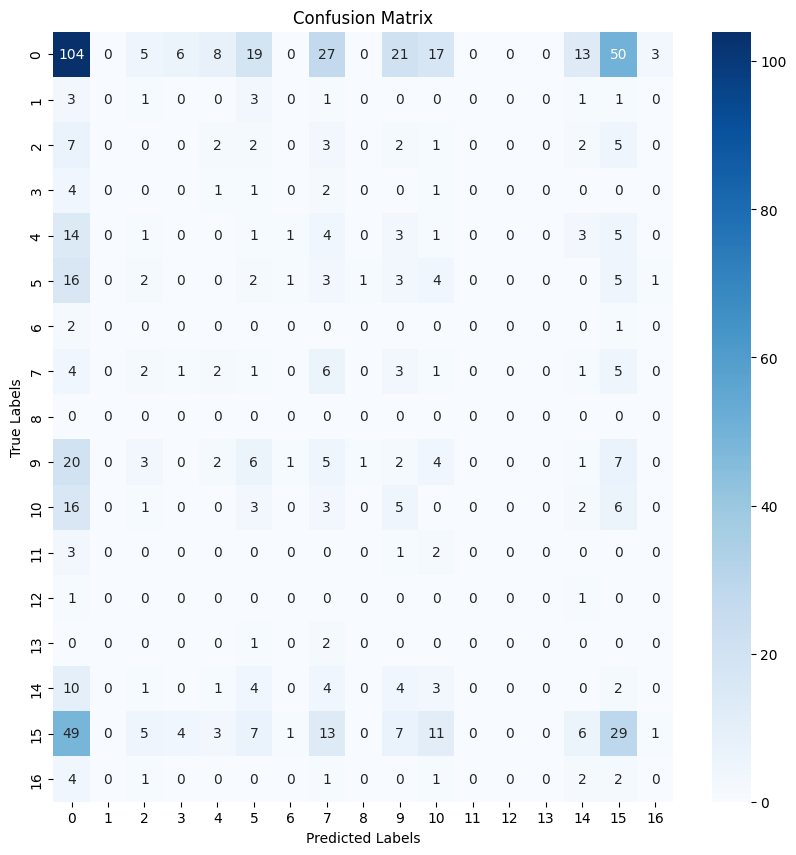

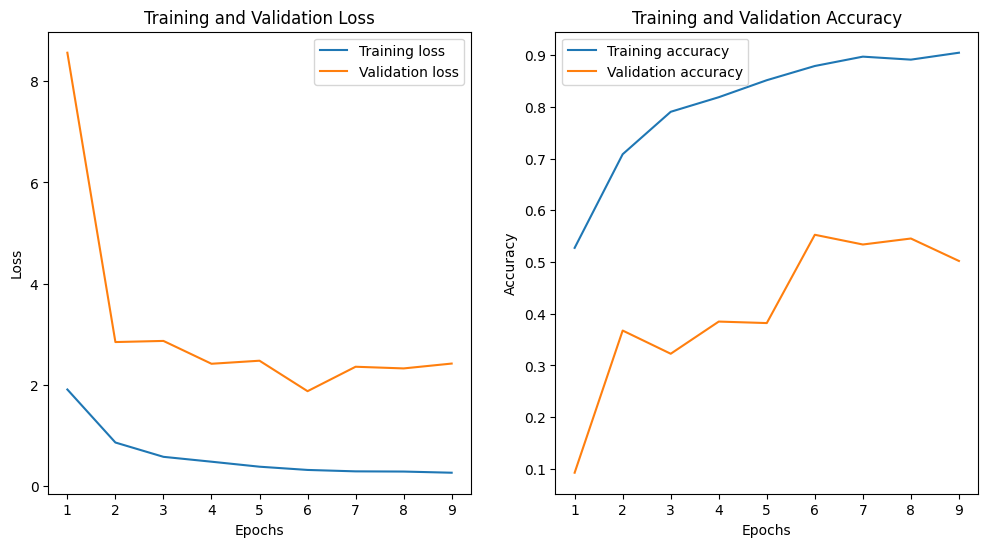

In [ ]:
val_ds = val_ds_224
eval_model = vgg19_model
history = vgg19_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## VGG19 + layer[512, 256, 19], (224, 224, 3)
### val_accuracy: 0.5485

In [ ]:
model_name = 'VGG19'
weights = 'imagenet'
include_top = False
input_shape = (224, 224, 3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
vgg19_model2, vgg19_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

Epoch 1/10
87/87 [==============================] - 46s 458ms/step - loss: 1.8733 - accuracy: 0.5155 - val_loss: 6.0191 - val_accuracy: 0.0637
Epoch 2/10
87/87 [==============================] - 42s 454ms/step - loss: 1.0012 - accuracy: 0.6855 - val_loss: 2.6663 - val_accuracy: 0.4949
Epoch 3/10
87/87 [==============================] - 41s 442ms/step - loss: 0.6562 - accuracy: 0.7751 - val_loss: 1.8665 - val_accuracy: 0.5384
Epoch 4/10
87/87 [==============================] - 44s 467ms/step - loss: 0.4745 - accuracy: 0.8337 - val_loss: 1.7898 - val_accuracy: 0.5485
Epoch 5/10
87/87 [==============================] - 43s 467ms/step - loss: 0.3735 - accuracy: 0.8623 - val_loss: 1.9128 - val_accuracy: 0.5586
Epoch 6/10
87/87 [==============================] - 42s 458ms/step - loss: 0.3402 - accuracy: 0.8782 - val_loss: 2.0946 - val_accuracy: 0.5210
Epoch 7/10
87/87 [==============================] - 42s 457ms/step - loss: 0.2618 - accuracy: 0.9017 - val_loss: 1.9931 - val_accuracy: 0.5760

22/22 [==============================] - 50s 276ms/step
0.19971056439942114 0.19971056439942114 0.19971056439942114 0.19971056439942114


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

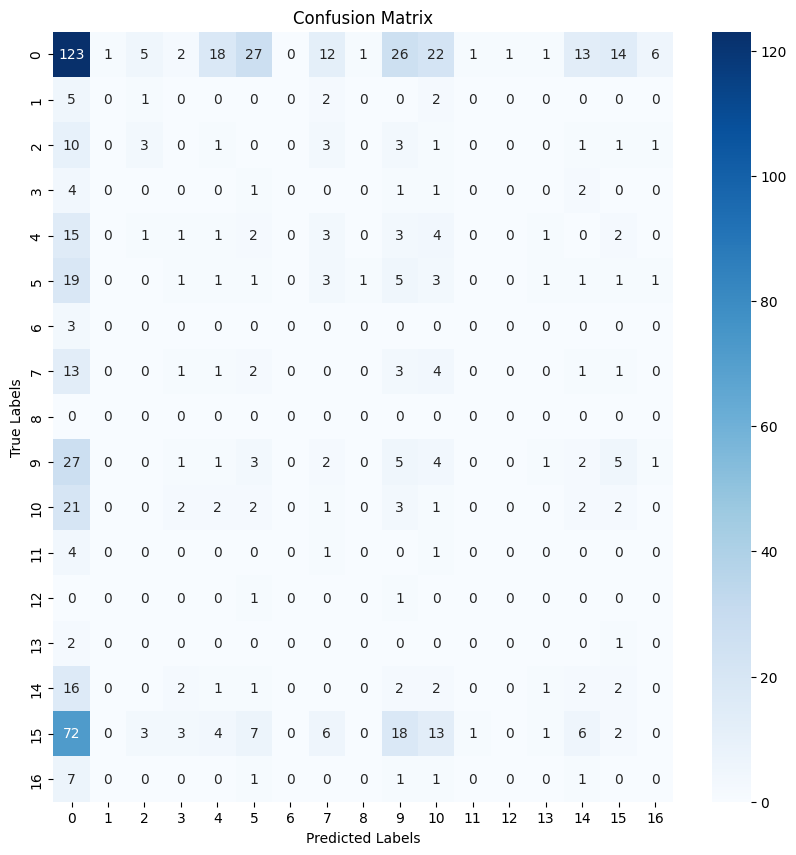

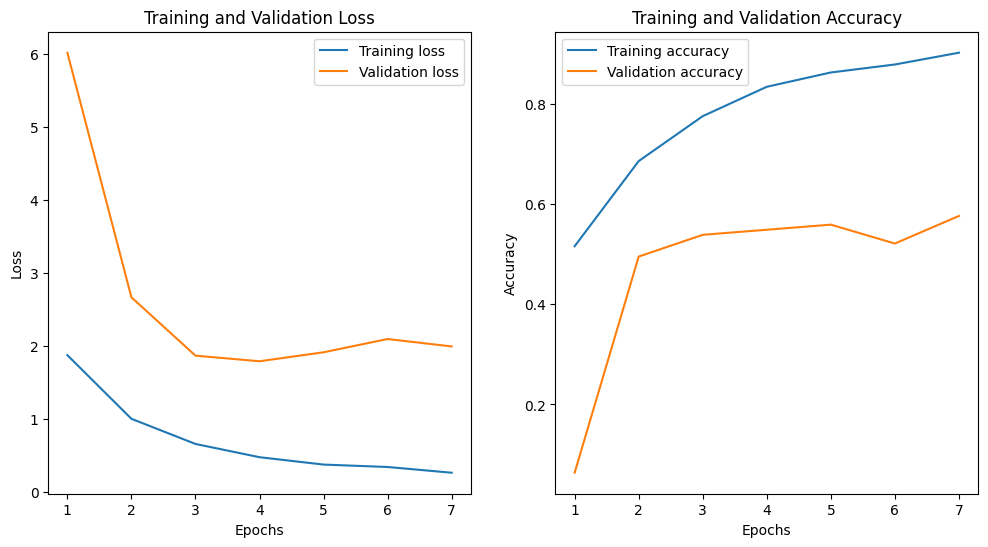

In [ ]:
val_ds = val_ds_224
eval_model = vgg19_model2
history = vgg19_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## ResNet152 + layer[1000, 19], (227, 227, 3)
### epochs=3 => val_loss: 2.2883 / val_accuracy: 0.4081

In [ ]:
model_name = 'ResNet152'
weights = 'imagenet'
include_top = False
input_shape = (227,227,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_227
val_ds = val_ds_227
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
resnet_model, resnet_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_227
eval_model = resnet_model
history = resnet_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## InceptionResNetV2 + layer[1000, 19], (299,299,3)
### epochs=3 => val_loss: 1.4844 / val_accuracy: 0.6527

In [ ]:
model_name = 'InceptionResNetV2'
weights = 'imagenet'
include_top = False
input_shape = (299,299,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_299
val_ds = val_ds_299
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
iresnet_model, iresnet_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_299
eval_model = iresnet_model
history = iresnet_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## InceptionResNetV2 + layer[512, 256, 19], (299,299,3)
### epochs=3 => val_loss: 1.3055 / val_accuracy: 0.6281

In [ ]:
model_name = 'InceptionResNetV2'
weights = 'imagenet'
include_top = False
input_shape = (299,299,3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_299
val_ds = val_ds_299
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
iresnet_model2, iresnet_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_299
eval_model = iresnet_model2
history = iresnet_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet121 + layer[1000, 19], (224,224,3)
### epochs=3 => val_loss: 1.2105 / val_accuracy: 0.6773

In [ ]:
model_name = 'DenseNet121'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet121_model, densenet121_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet121_model
history = densenet121_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet121 + layer[512, 256, 19], (224,224,3)
### epochs=3 => val_loss: 1.2737 / val_accuracy: 0.6671

In [ ]:
model_name = 'DenseNet121'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet121_model2, densenet121_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet121_model2
history = densenet121_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet169 + layer[1000, 19], (224,224,3)
### epochs=3 => val_loss: 1.1982 / val_accuracy: 0.6715

In [ ]:
model_name = 'DenseNet169'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet169_model, densenet169_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet169_model
history = densenet169_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet169 + layer[512, 256, 19], (224,224,3)
### epochs=3 => val_loss: 1.2265 / val_accuracy: 0.7004

In [ ]:
model_name = 'DenseNet169'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet169_model2, densenet169_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet169_model2
history = densenet169_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet201 + layer[1000, 19], (224,224,3)
### epochs=3 => val_loss: 1.2248 / val_accuracy: 0.6324

In [ ]:
model_name = 'DenseNet201'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet201_model, densenet201_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet201_model
history = densenet201_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## DenseNet201 + layer[512, 256, 19], (224,224,3)
### epochs=3 => val_loss: 1.2371 / val_accuracy: 0.6787

In [ ]:
model_name = 'DenseNet201'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
densenet201_model2, densenet201_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = densenet201_model2
history = densenet201_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## MobileNet + layer[1000, 19], (224,224,3)
### epochs=3 => val_loss: 1.2304 / val_accuracy: 0.6758

In [ ]:
model_name = 'MobileNet'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [1000]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
mnet_model, mnet_history = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = mnet_model
history = mnet_history

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)

## MobileNet + layer[5122, 256, 19] (224,224,3)
### epochs=3 => val_loss: 1.0961 / val_accuracy: 0.6975

In [ ]:
model_name = 'MobileNet'
weights = 'imagenet'
include_top = False
input_shape = (224,224,3)
fc_unit_list = [512, 256]
num_classes = 19
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'
train_ds = train_ds_224
val_ds = val_ds_224
epochs=10

# 모델 설정
custommodel.get_basemodel(model_name, weights, include_top, input_shape)
custommodel.add_layer(fc_unit_list, num_classes)
mnet_model2, mnet_history2 = custommodel.get_headmodel(optimizer, loss, metrics, train_ds, val_ds, epochs)

In [ ]:
val_ds = val_ds_224
eval_model = mnet_model2
history = mnet_history2

y_df, y_pred, y_true = evaluation.get_prediction(eval_model, val_ds)
precision, recall, accuracy, f1 = evaluation.get_score()
print(precision, recall, accuracy, f1)

evaluation.get_confusion_matrix()
evaluation.get_visualization(history)